In [17]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
import arcpy
import pandas

In [12]:
data = arcpy.da.FeatureClassToNumPyArray("../data/weather.shp",
                                         ["SHAPE@X","SHAPE@Y","max"])

In [18]:
pd = pandas.DataFrame(data)

In [20]:
pd.head()

,SHAPE@X,SHAPE@Y,max
0,1.290045e+07,4.704248e+06,15
1,1.283901e+07,4.635198e+06,14
2,1.285633e+07,4.613838e+06,13
3,1.295710e+07,4.855773e+06,14
4,1.307018e+07,4.810230e+06,15


In [157]:
pd = pd.sort_values(by ="SHAPE@X")

In [158]:
x = np.array(pd["SHAPE@X"].tolist())
y = np.array(pd["max"].tolist())

In [159]:
len(y)

170

In [160]:
x = np.arange(0,170)

In [161]:
len(x)

170

In [191]:
f = interpolate.spline(x,y,np.linspace(10, 50, 400))
f2 = interpolate.spline(x,y,np.linspace(10, 50, 400),order=2)

D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  """Entry point for launching an IPython kernel.
D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


In [212]:
f[349]

15.99434742493608

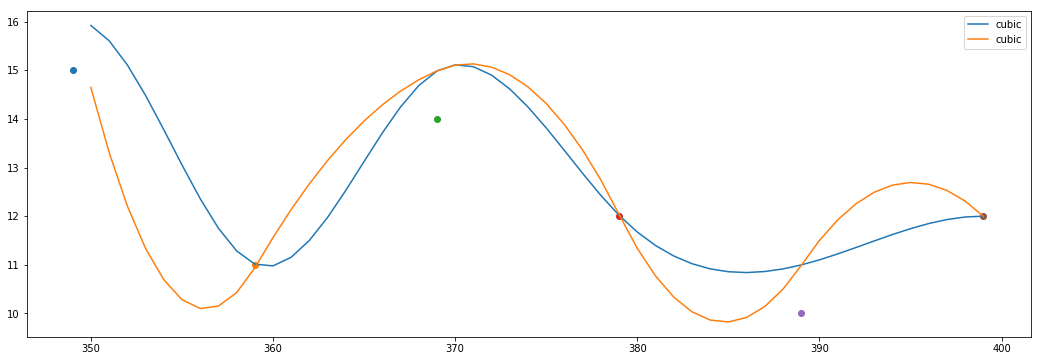

In [215]:
fig, ax = plt.subplots(figsize=(18, 6))
for i in range(10,70,10):
    ax.scatter(i+339,int(f[i+339]))
ax.plot(range(350,len(f)), f[350:len(f)], label= "cubic")
ax.plot(range(350,len(f2)), f2[350:len(f2)], label= "cubic")
ax.legend()
plt.show()